In [1]:
import xarray as xr
import rioxarray as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPolygon


In [2]:
# file_name = '../data/teste/oco2_LtCO2_190802_B10206Ar_200729204909s.nc4'

file_name = '/mnt/g/My Drive/Postdoc/MapBiomas Ar/mapbiomas-air/data/teste/oco2_LtCO2_190802_B10206Ar_200729204909s.nc4'
nc_file = xr.open_dataset(file_name)
nc_file

<xarray.Dataset>
Dimensions:                 (sounding_id: 178213, levels: 20, bands: 3,
                             vertices: 4, footprints: 8, epoch_dimension: 7,
                             source_files: 15)
Coordinates:
  * sounding_id             (sounding_id) float64 2.019e+15 ... 2.019e+15
  * levels                  (levels) int16 1 2 3 4 5 6 7 ... 15 16 17 18 19 20
  * bands                   (bands) int16 1 2 3
  * vertices                (vertices) int16 1 2 3 4
  * footprints              (footprints) int16 1 2 3 4 5 6 7 8
  * source_files            (source_files) object '/oco2/product/Ops_B10004_r...
Dimensions without coordinates: epoch_dimension
Data variables: (12/19)
    date                    (sounding_id, epoch_dimension) float32 ...
    latitude                (sounding_id) float32 ...
    longitude               (sounding_id) float32 ...
    time                    (sounding_id) datetime64[ns] ...
    solar_zenith_angle      (sounding_id) float32 ...
    sensor_zenith_angle     (sounding_id) float32 ...
    ...                      ...
    xco2_uncertainty        (sounding_id) float32 ...
    xco2_apriori            (sounding_id) float32 ...
    pressure_levels         (sounding_id, levels) float32 ...
    co2_profile_apriori     (sounding_id, levels) float32 ...
    xco2_averaging_kernel   (sounding_id, levels) float32 ...
    pressure_weight         (sounding_id, levels) float32 ...
Attributes: (12/22)
    identifier_product_doi:            10.5067/E4E140XDMPO2
    identifier_product_doi_authority:  http://dx.doi.org/
    filter_function:                   oco2_xco2_quality_flag_b10
    bc_function:                       oco2_xco2_bias_correct_b10
    warn_level_function:               From_L2Std
    Bias_Correction_land:              XCO2_Bias_Corrected = (XCO2_Raw + 0.85...
    ...                                ...
    CollectionLabel:                   Ops_B10004_r02
    L2FullPhysicsExeVersion:           SVN-B10.0.04_sdos_testing_1-34838
    title:                             ACOS L2 Lite Output
    filtering state:                   Filtered with oco2_lite_file_prefilter...
    creation_date:                     Jul 2020
    contact:                           Chris O'Dell: odell@atmos.colostate.edu

In [3]:
xco2 = nc_file[[
    'longitude',
    'latitude',
    'xco2',
    'time',
    'vertex_longitude',
    'vertex_latitude'
]]

xco2.rio.set_crs("epsg:4326")

df = xco2.to_dataframe()

df = df.reset_index()

df['vertices'] = df['vertices'].astype(str)

df

,sounding_id,vertices,longitude,latitude,xco2,time,vertex_longitude,vertex_latitude
0,2.019080e+15,1,-164.989624,-44.294376,408.578827,2019-08-02 00:55:05.388991488,-164.973373,-44.309296
1,2.019080e+15,2,-164.989624,-44.294376,408.578827,2019-08-02 00:55:05.388991488,-164.977936,-44.291874
2,2.019080e+15,3,-164.989624,-44.294376,408.578827,2019-08-02 00:55:05.388991488,-165.006165,-44.285286
3,2.019080e+15,4,-164.989624,-44.294376,408.578827,2019-08-02 00:55:05.388991488,-165.001602,-44.302704
4,2.019080e+15,1,-164.896027,-44.151203,408.189575,2019-08-02 00:55:08.588008704,-164.879379,-44.165497
...,...,...,...,...,...,...,...,...
712847,2.019080e+15,4,-151.484680,-42.644569,407.509491,2019-08-02 23:59:59.695998464,-151.495407,-42.653385
712848,2.019080e+15,1,-151.511337,-42.637928,406.944244,2019-08-02 23:59:59.722994688,-151.495850,-42.652836
712849,2.019080e+15,2,-151.511337,-42.637928,406.944244,2019-08-02 23:59:59.722994688,-151.500458,-42.634762
712850,2.019080e+15,3,-151.511337,-42.637928,406.944244,2019-08-02 23:59:59.722994688,-151.527161,-42.628601


In [4]:
dfp = pd.pivot_table(df,
                     index=['sounding_id', 'time', 'latitude', 'longitude', 'xco2'],
                     columns='vertices',
                     values=['vertex_longitude', 'vertex_latitude'])

dfp = dfp.reset_index()

dfp.columns = dfp.columns.map('_'.join).str.strip('_')

dfp

,sounding_id,time,latitude,longitude,xco2,vertex_latitude_1,vertex_latitude_2,vertex_latitude_3,vertex_latitude_4,vertex_longitude_1,vertex_longitude_2,vertex_longitude_3,vertex_longitude_4
0,2.019080e+15,2019-08-02 00:55:05.388991488,-44.294376,-164.989624,408.578827,-44.309296,-44.291874,-44.285286,-44.302704,-164.973373,-164.977936,-165.006165,-165.001602
1,2.019080e+15,2019-08-02 00:55:08.588008704,-44.151203,-164.896027,408.189575,-44.165497,-44.147625,-44.141106,-44.158974,-164.879379,-164.884140,-164.912262,-164.907516
2,2.019080e+15,2019-08-02 00:55:08.749021440,-44.110569,-165.063614,408.812805,-44.125660,-44.107811,-44.101391,-44.119236,-165.047256,-165.051910,-165.079422,-165.074783
3,2.019080e+15,2019-08-02 00:55:08.921018112,-44.133297,-164.900787,408.549072,-44.147587,-44.129795,-44.123310,-44.141071,-164.884140,-164.888901,-164.917007,-164.912262
4,2.019080e+15,2019-08-02 00:55:09.254993408,-44.115665,-164.905563,408.375031,-44.129761,-44.112255,-44.105774,-44.123276,-164.888916,-164.893707,-164.921799,-164.917023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178208,2.019080e+15,2019-08-02 23:59:59.056009984,-42.674145,-151.502090,406.153473,-42.688919,-42.670982,-42.664818,-42.682774,-151.486664,-151.491211,-151.517944,-151.513397
178209,2.019080e+15,2019-08-02 23:59:59.362988800,-42.662682,-151.480057,406.901154,-42.677563,-42.659485,-42.653423,-42.671497,-151.464554,-151.469177,-151.495407,-151.490784
178210,2.019080e+15,2019-08-02 23:59:59.588012800,-42.669205,-151.378662,403.061432,-42.683323,-42.665230,-42.659126,-42.677216,-151.362762,-151.367447,-151.394196,-151.389526
178211,2.019080e+15,2019-08-02 23:59:59.695998464,-42.644569,-151.484680,407.509491,-42.659447,-42.641369,-42.635311,-42.653385,-151.469193,-151.473816,-151.500031,-151.495407


In [5]:
dfp['geometry'] = dfp.apply(
    lambda s: Polygon(shell=[
        Point(s.vertex_longitude_1, s.vertex_latitude_1),
        Point(s.vertex_longitude_2, s.vertex_latitude_2),
        Point(s.vertex_longitude_3, s.vertex_latitude_3),
        Point(s.vertex_longitude_4, s.vertex_latitude_4),
        Point(s.vertex_longitude_1, s.vertex_latitude_1)
    ]),
    axis=1
)

dfp


,sounding_id,time,latitude,longitude,xco2,vertex_latitude_1,vertex_latitude_2,vertex_latitude_3,vertex_latitude_4,vertex_longitude_1,vertex_longitude_2,vertex_longitude_3,vertex_longitude_4,geometry
0,2.019080e+15,2019-08-02 00:55:05.388991488,-44.294376,-164.989624,408.578827,-44.309296,-44.291874,-44.285286,-44.302704,-164.973373,-164.977936,-165.006165,-165.001602,POLYGON ((-164.97337341308594 -44.309295654296...
1,2.019080e+15,2019-08-02 00:55:08.588008704,-44.151203,-164.896027,408.189575,-44.165497,-44.147625,-44.141106,-44.158974,-164.879379,-164.884140,-164.912262,-164.907516,POLYGON ((-164.87937927246094 -44.165496826171...
2,2.019080e+15,2019-08-02 00:55:08.749021440,-44.110569,-165.063614,408.812805,-44.125660,-44.107811,-44.101391,-44.119236,-165.047256,-165.051910,-165.079422,-165.074783,POLYGON ((-165.04725646972656 -44.125659942626...
3,2.019080e+15,2019-08-02 00:55:08.921018112,-44.133297,-164.900787,408.549072,-44.147587,-44.129795,-44.123310,-44.141071,-164.884140,-164.888901,-164.917007,-164.912262,POLYGON ((-164.88414001464844 -44.147586822509...
4,2.019080e+15,2019-08-02 00:55:09.254993408,-44.115665,-164.905563,408.375031,-44.129761,-44.112255,-44.105774,-44.123276,-164.888916,-164.893707,-164.921799,-164.917023,"POLYGON ((-164.888916015625 -44.1297607421875,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178208,2.019080e+15,2019-08-02 23:59:59.056009984,-42.674145,-151.502090,406.153473,-42.688919,-42.670982,-42.664818,-42.682774,-151.486664,-151.491211,-151.517944,-151.513397,POLYGON ((-151.48666381835938 -42.688919067382...
178209,2.019080e+15,2019-08-02 23:59:59.362988800,-42.662682,-151.480057,406.901154,-42.677563,-42.659485,-42.653423,-42.671497,-151.464554,-151.469177,-151.495407,-151.490784,POLYGON ((-151.4645538330078 -42.6775627136230...
178210,2.019080e+15,2019-08-02 23:59:59.588012800,-42.669205,-151.378662,403.061432,-42.683323,-42.665230,-42.659126,-42.677216,-151.362762,-151.367447,-151.394196,-151.389526,POLYGON ((-151.36276245117188 -42.683322906494...
178211,2.019080e+15,2019-08-02 23:59:59.695998464,-42.644569,-151.484680,407.509491,-42.659447,-42.641369,-42.635311,-42.653385,-151.469193,-151.473816,-151.500031,-151.495407,POLYGON ((-151.4691925048828 -42.6594467163085...


In [6]:
dfp.pop('vertex_longitude_1')
dfp.pop('vertex_longitude_2')
dfp.pop('vertex_longitude_3')
dfp.pop('vertex_longitude_4')
dfp.pop('vertex_latitude_1')
dfp.pop('vertex_latitude_2')
dfp.pop('vertex_latitude_3')
dfp.pop('vertex_latitude_4')
dfp.pop('longitude')
dfp.pop('latitude')

dfp


,sounding_id,time,xco2,geometry
0,2.019080e+15,2019-08-02 00:55:05.388991488,408.578827,POLYGON ((-164.97337341308594 -44.309295654296...
1,2.019080e+15,2019-08-02 00:55:08.588008704,408.189575,POLYGON ((-164.87937927246094 -44.165496826171...
2,2.019080e+15,2019-08-02 00:55:08.749021440,408.812805,POLYGON ((-165.04725646972656 -44.125659942626...
3,2.019080e+15,2019-08-02 00:55:08.921018112,408.549072,POLYGON ((-164.88414001464844 -44.147586822509...
4,2.019080e+15,2019-08-02 00:55:09.254993408,408.375031,"POLYGON ((-164.888916015625 -44.1297607421875,..."
...,...,...,...,...
178208,2.019080e+15,2019-08-02 23:59:59.056009984,406.153473,POLYGON ((-151.48666381835938 -42.688919067382...
178209,2.019080e+15,2019-08-02 23:59:59.362988800,406.901154,POLYGON ((-151.4645538330078 -42.6775627136230...
178210,2.019080e+15,2019-08-02 23:59:59.588012800,403.061432,POLYGON ((-151.36276245117188 -42.683322906494...
178211,2.019080e+15,2019-08-02 23:59:59.695998464,407.509491,POLYGON ((-151.4691925048828 -42.6594467163085...


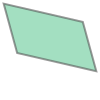

In [7]:
dfp['geometry'][4]

In [8]:
dfp['time'] = dfp['time'].astype(str)

In [9]:
gdf = gpd.GeoDataFrame(dfp, geometry='geometry', crs="EPSG:4326")

gdf


,sounding_id,time,xco2,geometry
0,2.019080e+15,2019-08-02 00:55:05.388991488,408.578827,"POLYGON ((-164.97337 -44.30930, -164.97794 -44..."
1,2.019080e+15,2019-08-02 00:55:08.588008704,408.189575,"POLYGON ((-164.87938 -44.16550, -164.88414 -44..."
2,2.019080e+15,2019-08-02 00:55:08.749021440,408.812805,"POLYGON ((-165.04726 -44.12566, -165.05191 -44..."
3,2.019080e+15,2019-08-02 00:55:08.921018112,408.549072,"POLYGON ((-164.88414 -44.14759, -164.88890 -44..."
4,2.019080e+15,2019-08-02 00:55:09.254993408,408.375031,"POLYGON ((-164.88892 -44.12976, -164.89371 -44..."
...,...,...,...,...
178208,2.019080e+15,2019-08-02 23:59:59.056009984,406.153473,"POLYGON ((-151.48666 -42.68892, -151.49121 -42..."
178209,2.019080e+15,2019-08-02 23:59:59.362988800,406.901154,"POLYGON ((-151.46455 -42.67756, -151.46918 -42..."
178210,2.019080e+15,2019-08-02 23:59:59.588012800,403.061432,"POLYGON ((-151.36276 -42.68332, -151.36745 -42..."
178211,2.019080e+15,2019-08-02 23:59:59.695998464,407.509491,"POLYGON ((-151.46919 -42.65945, -151.47382 -42..."


Text(0.5, 1.0, 'xco2')

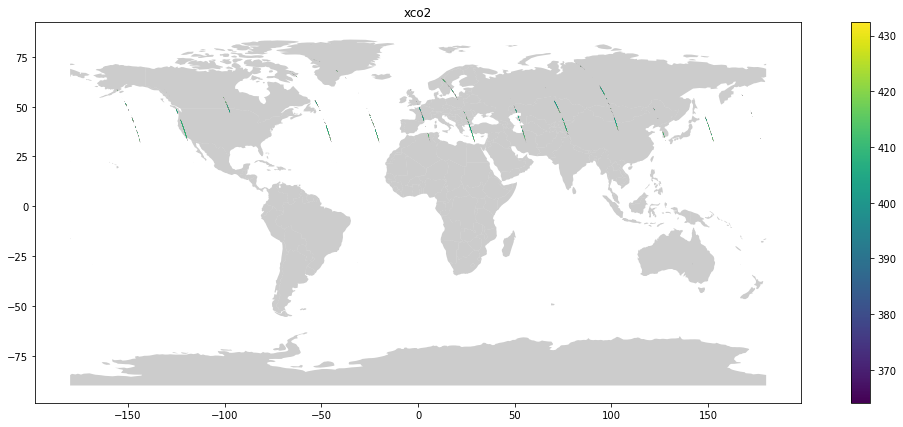

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18, 7))
world.plot(ax=ax, alpha=0.4, color='grey')
gdf.plot(column='xco2', ax=ax, legend=True)

plt.title('xco2')


In [11]:
gdf

,sounding_id,time,xco2,geometry
0,2.019080e+15,2019-08-02 00:55:05.388991488,408.578827,"POLYGON ((-164.97337 -44.30930, -164.97794 -44..."
1,2.019080e+15,2019-08-02 00:55:08.588008704,408.189575,"POLYGON ((-164.87938 -44.16550, -164.88414 -44..."
2,2.019080e+15,2019-08-02 00:55:08.749021440,408.812805,"POLYGON ((-165.04726 -44.12566, -165.05191 -44..."
3,2.019080e+15,2019-08-02 00:55:08.921018112,408.549072,"POLYGON ((-164.88414 -44.14759, -164.88890 -44..."
4,2.019080e+15,2019-08-02 00:55:09.254993408,408.375031,"POLYGON ((-164.88892 -44.12976, -164.89371 -44..."
...,...,...,...,...
178208,2.019080e+15,2019-08-02 23:59:59.056009984,406.153473,"POLYGON ((-151.48666 -42.68892, -151.49121 -42..."
178209,2.019080e+15,2019-08-02 23:59:59.362988800,406.901154,"POLYGON ((-151.46455 -42.67756, -151.46918 -42..."
178210,2.019080e+15,2019-08-02 23:59:59.588012800,403.061432,"POLYGON ((-151.36276 -42.68332, -151.36745 -42..."
178211,2.019080e+15,2019-08-02 23:59:59.695998464,407.509491,"POLYGON ((-151.46919 -42.65945, -151.47382 -42..."


In [12]:
import time
start_time = time.time()
gdf.to_file('timetest.shp')

print('Processing time:', time.time()-start_time)

/home/mjt/miniconda3/envs/gdal/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/tmp/ipykernel_440/2573877723.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('timetest.shp')


Processing time: 553.1913893222809
